## Business Context:
The project aims to develop a machine learning system to predict customer churn in the telecommunications industry.

Customer churn is defined as when customers discontinue their business with a firm. Retaining existing customers is more cost-effective than acquiring new ones, making churn prediction a critical business metric.

Telecom companies face annual churn rates of 15-25% due to intense competition. By predicting churn, these companies can proactively focus on retaining high-risk customers, improving customer loyalty, and expanding their market position.

Reducing churn not only helps preserve the existing customer base but also lowers acquisition costs, increases profitability, and ensures long-term growth. The project aims to develop insights and actionable strategies to minimize customer attrition and enhance retention efforts.

## Key Stakeholders
**Telecom Companies**:
To improve customer retention strategies, reduce churn rates, and optimize profitability.

**Customer Retention Teams**:
For identifying high-risk customers and deploying targeted retention campaigns.

**Business Analysts**:
To analyze patterns and trends in customer behavior and churn.

**Marketing Teams**:
To tailor personalized offerings and incentives for at-risk customers.

**Data Scientists**:
To build and refine predictive churn models, enabling actionable insights.

**Executives and Decision Makers**:
To align strategic business goals with churn reduction efforts, ultimately driving customer satisfaction and revenue growth.

## Loading libraries and data

In [44]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv('behavior_cleandata.csv')

## About the Dataset
The dataset contains information on telecom customers and their attributes, aimed at predicting customer churn. Below are the features and their types:

**customerID**: Unique identifier for each customer. Categorical.

**gender**: Gender of the customer. Values: Male, Female. Categorical.

**SeniorCitizen**: Indicates if the customer is a senior citizen. Values: 0 (No), 1 (Yes). Binary.

**Partner**: Indicates if the customer has a partner. Values: Yes, No. Categorical.

**Dependents**: Indicates if the customer has dependents. Values: Yes, No. Categorical.

**Tenure**: Number of months the customer has stayed with the company. Continuous.

PhoneService: Indicates if the customer has phone service. Values: Yes, No. Categorical.

**MultipleLines**: Indicates if the customer has multiple phone lines. Values: Yes, No, No phone service. Categorical.

**InternetService**: Type of internet service the customer subscribes to. Values: DSL, Fiber optic, No. Categorical.

**OnlineSecurity**: Indicates if the customer has online security service. Values: Yes, No, No internet service. Categorical.

**DeviceProtection**: Indicates if the customer has device protection service. Values: Yes, No, No internet service. Categorical.

**TechSupport**: Indicates if the customer has tech support service. Values: Yes, No, No internet service. Categorical.

**StreamingTV**: Indicates if the customer has streaming TV service. Values: Yes, No, No internet service. Categorical.

**StreamingMovies**: Indicates if the customer has streaming movie service. Values: Yes, No, No internet service. Categorical.

**Contract**: Type of contract the customer has. Values: Month-to-month, One year, Two year. Categorical.

**PaperlessBilling**: Indicates if the customer has opted for paperless billing. Values: Yes, No. Categorical.

**PaymentMethod**: Payment method used by the customer. Values: Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic). Categorical.

**MonthlyCharges**: The monthly charges for the customer’s services. Continuous.

**TotalCharges**: Total amount charged to the customer. Continuous.

**Churn**: Indicates whether the customer has churned. Values: Yes, No. Binary.

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [39]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [40]:
#Removing missing values
df.dropna(inplace = True)
#Remove customer IDs from the data set
df = df.iloc[:,1:]

df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [41]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


<Axes: >

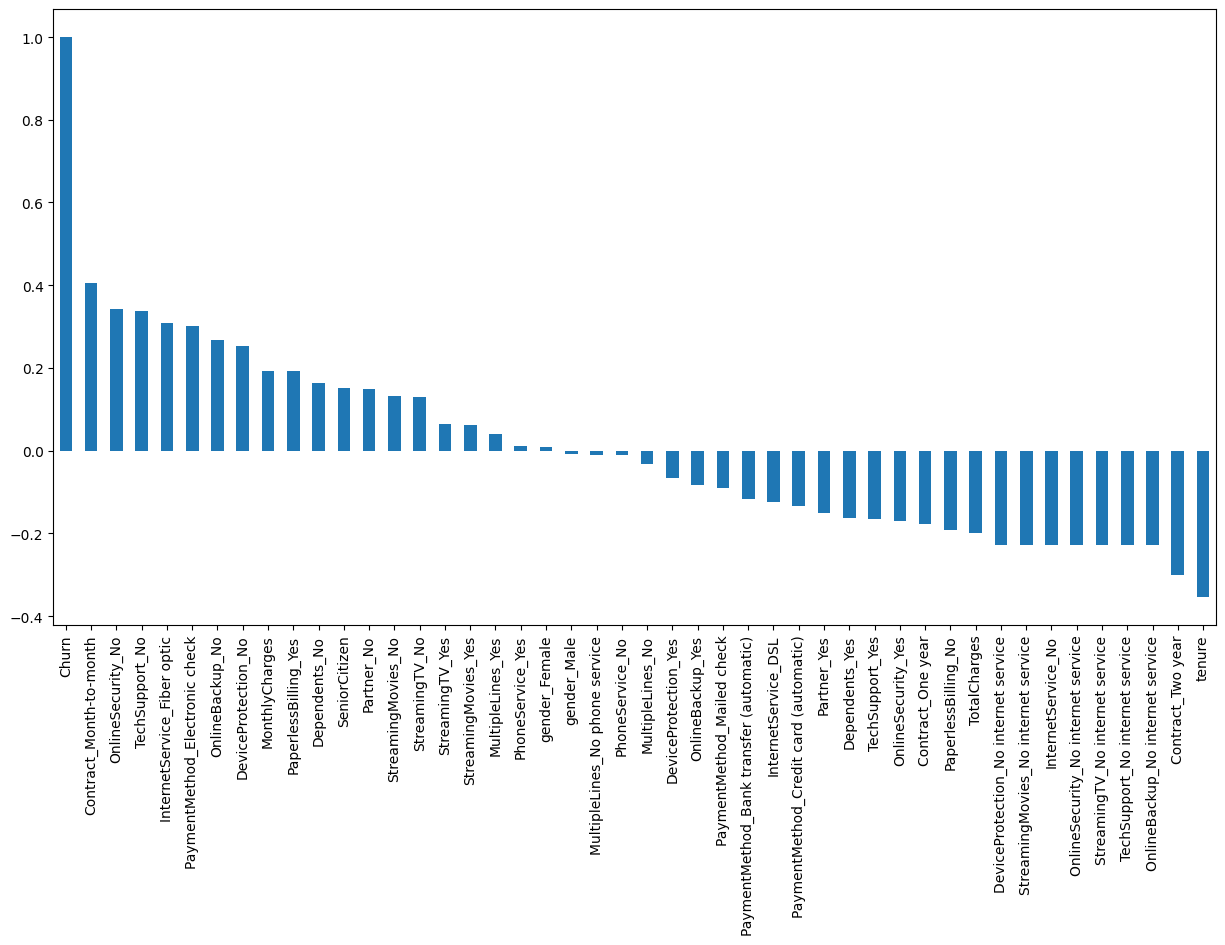

In [42]:
df_dummies = pd.get_dummies(df)
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Customers with month-to-month contracts and lacking online security or tech support are more likely to churn. In contrast, longer tenure and two-year contracts are associated with lower churn rates.

Notably, services like online security, streaming TV, online backup, and tech support, when used without an internet connection, tend to have a negative association with churn.

We will further investigate these correlations before building a model and identifying the most significant variables.

## Data Exploration

### Gender

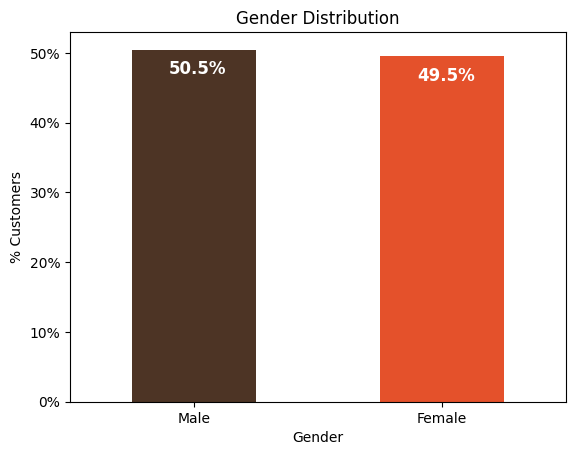

In [45]:
colors = ['#4D3425','#E4512B']
ax = (df["gender"].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')


### Senior Citizen

Text(0.5, 1.0, '% of Senior Citizens')

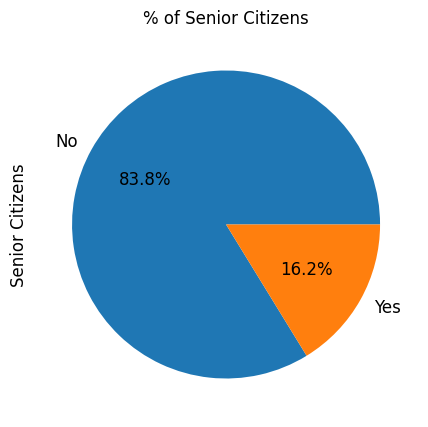

In [46]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

### Partner and dependent status

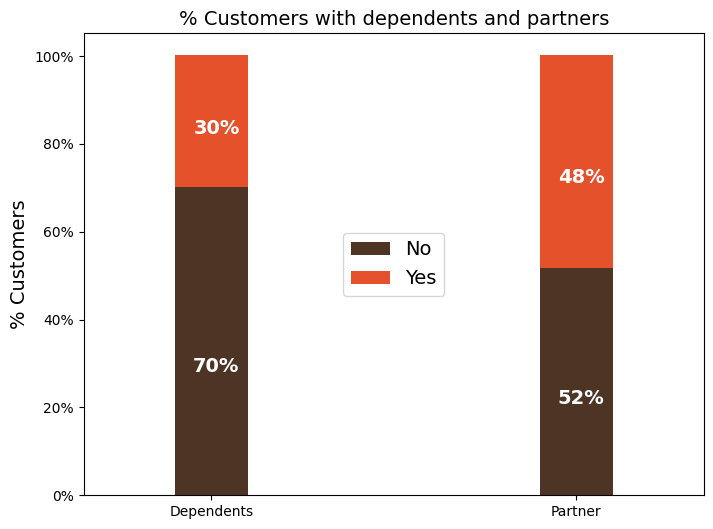

In [50]:
df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3 = df2.groupby(['variable','value']).count().unstack()
df3 = df3*100/len(df)
colors = ['#4D3425','#E4512B']
ax = df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('')
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

## Model

### logistic regression

In [52]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [76]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [77]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [78]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.819431279620853


Axes(0.125,0.11;0.775x0.77)


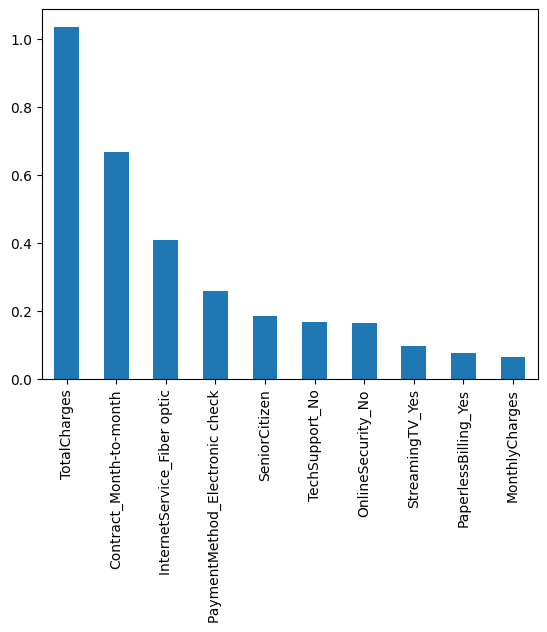

In [79]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

### random forest

In [74]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,random_state =50, max_features = "log2",max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))


0.8180525941719972


<Axes: >

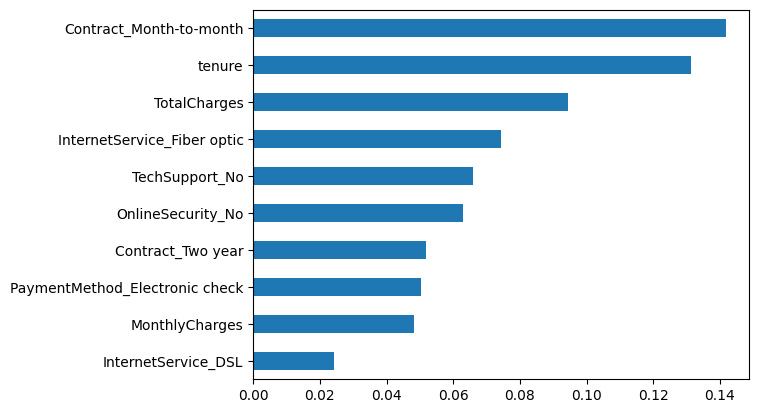

In [75]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [73]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear')
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.820184790334044

In [82]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

model_xgb = xgb.XGBClassifier(random_state=42) # You can customize hyperparameters here
model_xgb.fit(X_train, y_train)

prediction_test = model_xgb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction_test)
print(f"XGBoost Accuracy: {accuracy}")

XGBoost Accuracy: 0.8059701492537313


In [83]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming X and y are already defined as in the previous code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Initialize and train the AdaBoost classifier
model_ada = AdaBoostClassifier(random_state=42)  # You can customize hyperparameters here
model_ada.fit(X_train, y_train)

# Make predictions
prediction_test = model_ada.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, prediction_test)
print(f"AdaBoost Accuracy: {accuracy}")

AdaBoost Accuracy: 0.8159203980099502


Now I've to make a better evaluation with a little bit more data exploration